In [28]:
import numpy as np
import matplotlib.pyplot as plt
 # generating data set A, B and C
A = np.array([
              0,1,1,1,0,
              1,0,0,0,1,
              1,1,1,1,1,
              1,0,0,0,1,
              1,0,0,0,1,
              1,0,0,0,1
              ])
B = np.array([
              1,1,1,1,0,
              1,0,0,0,1,
              1,1,1,1,0,
              1,0,0,0,1,
              1,0,0,0,1,
              1,1,1,1,0
              ])
C = np.array([
              0,1,1,1,1,
              1,0,0,0,0,
              1,0,0,0,0,
              1,0,0,0,0,
              1,0,0,0,0,
              0,1,1,1,1
              ])



In [19]:
#inputing labels for the data sets
X = np.array([A, B, C])
Y = np.array([
    [1,0,0], # for A
    [0,1,0], # for B
    [0,0,1], # for C
    ]) 


In [14]:
# activation functions
def sigmoid(X):
    return 1/(1 + np.exp(-X))

def sigmoid_derivative(X):
    return X * (1 - X)



In [ ]:
#weight initialization
np.random.seed(42)

input_size = 30
hidden_size = 10
output_size = 3
learning_rate = 0.5
epochs = 10000

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [23]:
# training through backpropagation
losses = []
accuracies = []
for epoch in range(epochs):
    #forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, w2) + b2
    output = sigmoid(z2)
    # loss calculation
    loss = np.mean((Y - output) ** 2)
    losses.append(loss)

    #accuracy calculation
    predictions = np.argmax(output, axis=1)
    labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracies.append(accuracy)

    #backpropagation
    error_output = output - Y
    delta_output = error_output * sigmoid_derivative(output)
    error_hidden = delta_output.dot(w2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    #weights update
    w2 += a1.T.dot(delta_output) * learning_rate
    b2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    w1 += X.T.dot(delta_hidden) * learning_rate
    b1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}')



Epoch 0, Loss: 0.4836, Accuracy: 0.33
Epoch 1000, Loss: 0.6665, Accuracy: 0.00
Epoch 2000, Loss: 0.6666, Accuracy: 0.00
Epoch 3000, Loss: 0.6666, Accuracy: 0.00
Epoch 4000, Loss: 0.6666, Accuracy: 0.00
Epoch 5000, Loss: 0.6666, Accuracy: 0.00
Epoch 6000, Loss: 0.6666, Accuracy: 0.00
Epoch 7000, Loss: 0.6666, Accuracy: 0.00
Epoch 8000, Loss: 0.6666, Accuracy: 0.00
Epoch 9000, Loss: 0.6666, Accuracy: 0.00


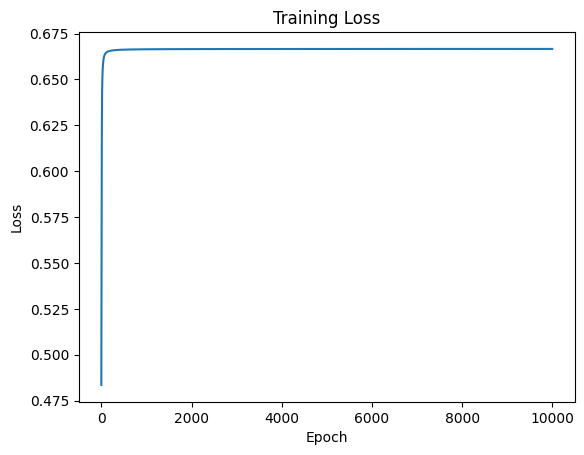

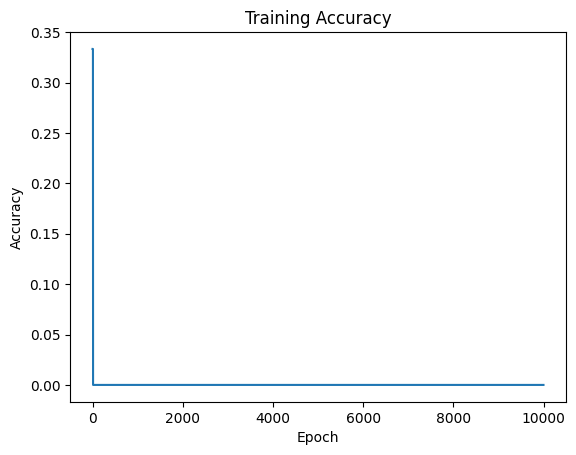

In [25]:
#training performance visualization
plt.figure()
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [26]:
# testing the model
def predict(input_data):
    z1 = np.dot(input_data, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    output =sigmoid(z2)
    return np.argmax(output, axis = 1)


Predicted class for the test image: B


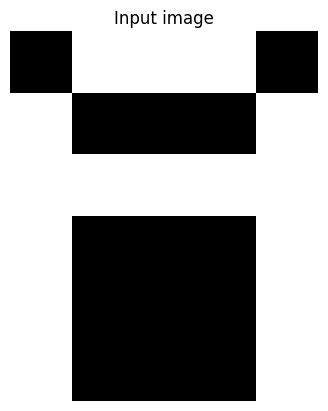

In [27]:
test_image = A 
prediction = predict(test_image)
labels = ['A', 'B', 'C']
print(f'Predicted class for the test image: {labels[prediction[0]]}')

plt.imshow(test_image.reshape(6,5), cmap = 'gray')
plt.title("Input image")
plt.axis("Off")
plt.show()
